In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['species'], axis = 1)
y = df_pen['species']

## Data Pre-processing

In [6]:
categorical_x = ['island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# # y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=101)

In [9]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [10]:
model = GradientBoostingClassifier()

In [11]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [12]:
base_pred = model.predict(X_test)

## Evaluation

In [13]:
y_pred = model.predict(X_test)

In [14]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [15]:
metrics.confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 22]], dtype=int64)

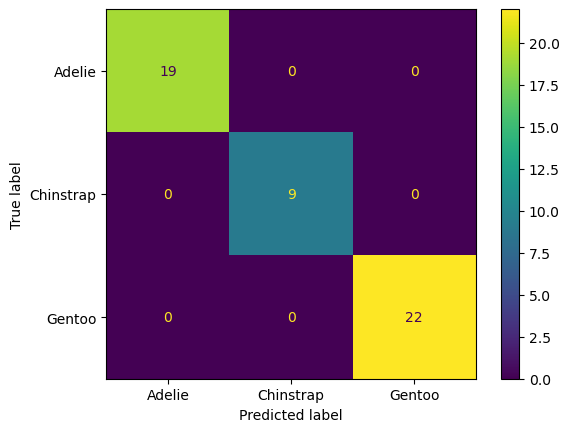

In [16]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_).plot()

In [17]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        19
   Chinstrap       1.00      1.00      1.00         9
      Gentoo       1.00      1.00      1.00        22

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [18]:
model.feature_importances_

array([1.24854365e-01, 3.19810188e-02, 1.92726007e-05, 4.51924353e-01,
       6.21228943e-02, 3.26158861e-01, 2.93923572e-03])

In [19]:
df_feature_importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_length_mm,0.451924
flipper_length_mm,0.326159
island_Dream,0.124854
bill_depth_mm,0.062123
island_Torgersen,0.031981
body_mass_g,0.002939
sex_Male,0.000019


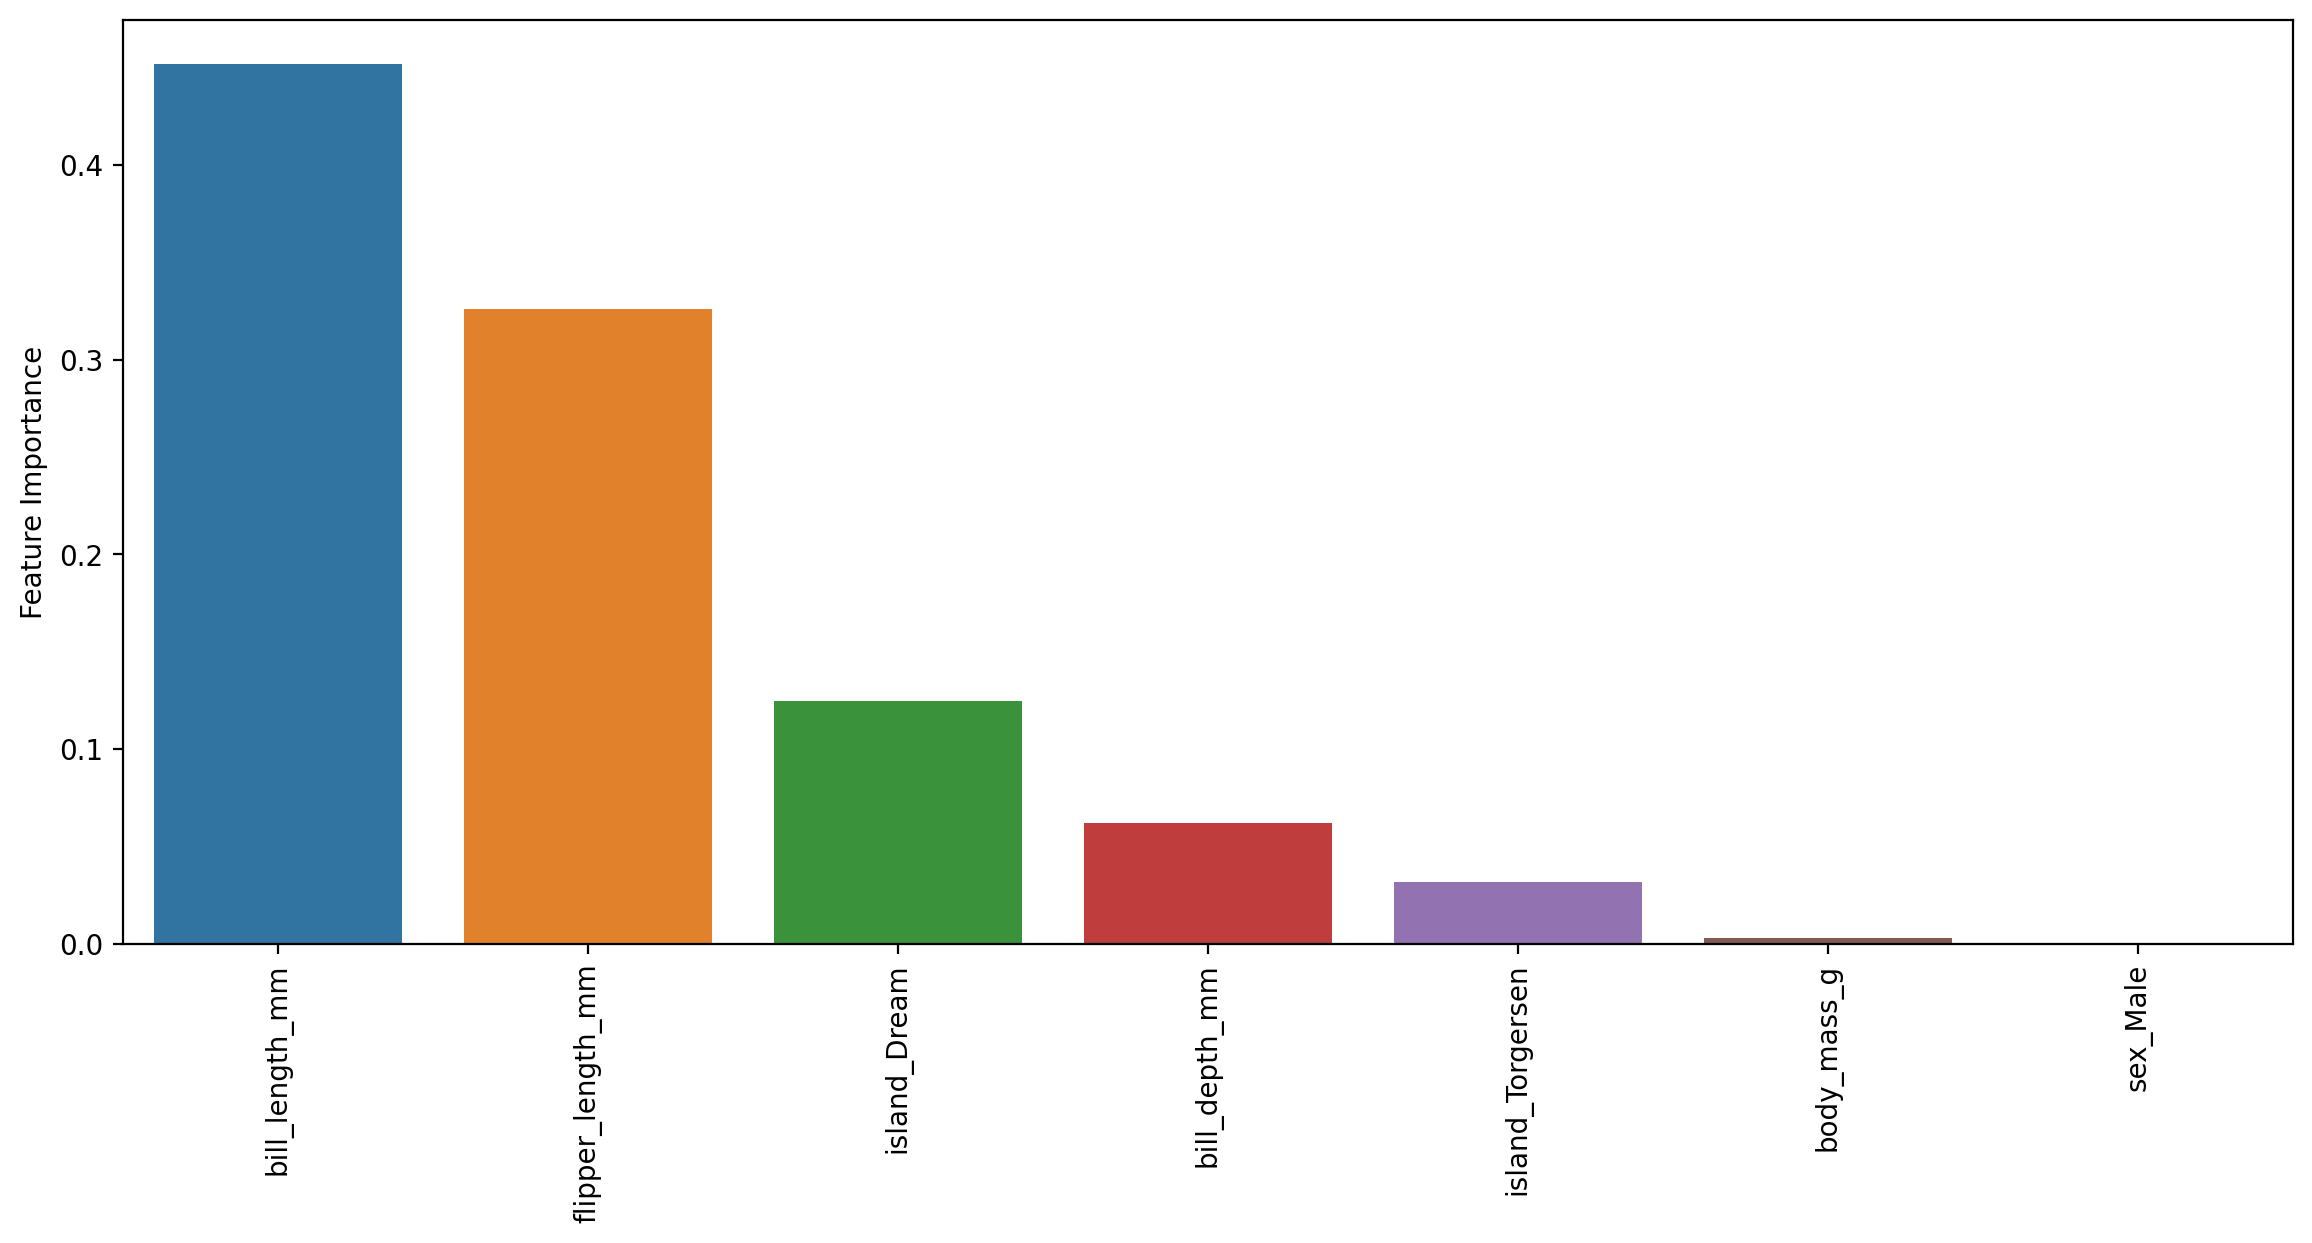

In [20]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = df_feature_importance,x=df_feature_importance.index,y='Feature Importance')

plt.xticks(rotation=90);

## Grid Search

In [21]:
model = GradientBoostingClassifier()

In [22]:
parametros = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [23]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [24]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='accuracy')

In [25]:
grid_model.best_params_

{'max_depth': 3, 'n_estimators': 10}

In [26]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [27]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [28]:
metrics.confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 22]], dtype=int64)

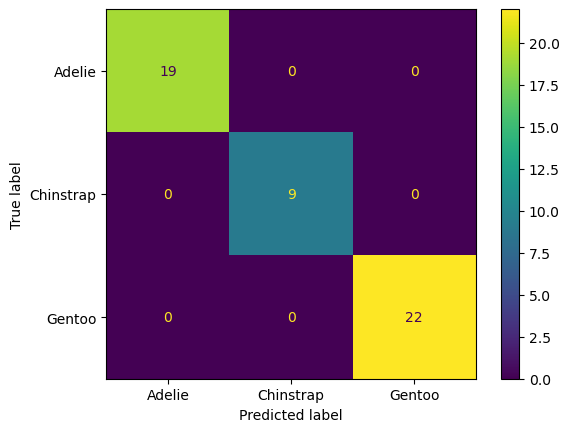

In [32]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_model.classes_).plot()

In [33]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        19
   Chinstrap       1.00      1.00      1.00         9
      Gentoo       1.00      1.00      1.00        22

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [34]:
grid_model.best_estimator_.feature_importances_

array([0.12489578, 0.03399671, 0.        , 0.45146077, 0.05604587,
       0.33284766, 0.00075321])

In [35]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_length_mm,0.451461
flipper_length_mm,0.332848
island_Dream,0.124896
bill_depth_mm,0.056046
island_Torgersen,0.033997
body_mass_g,0.000753
sex_Male,0.000000


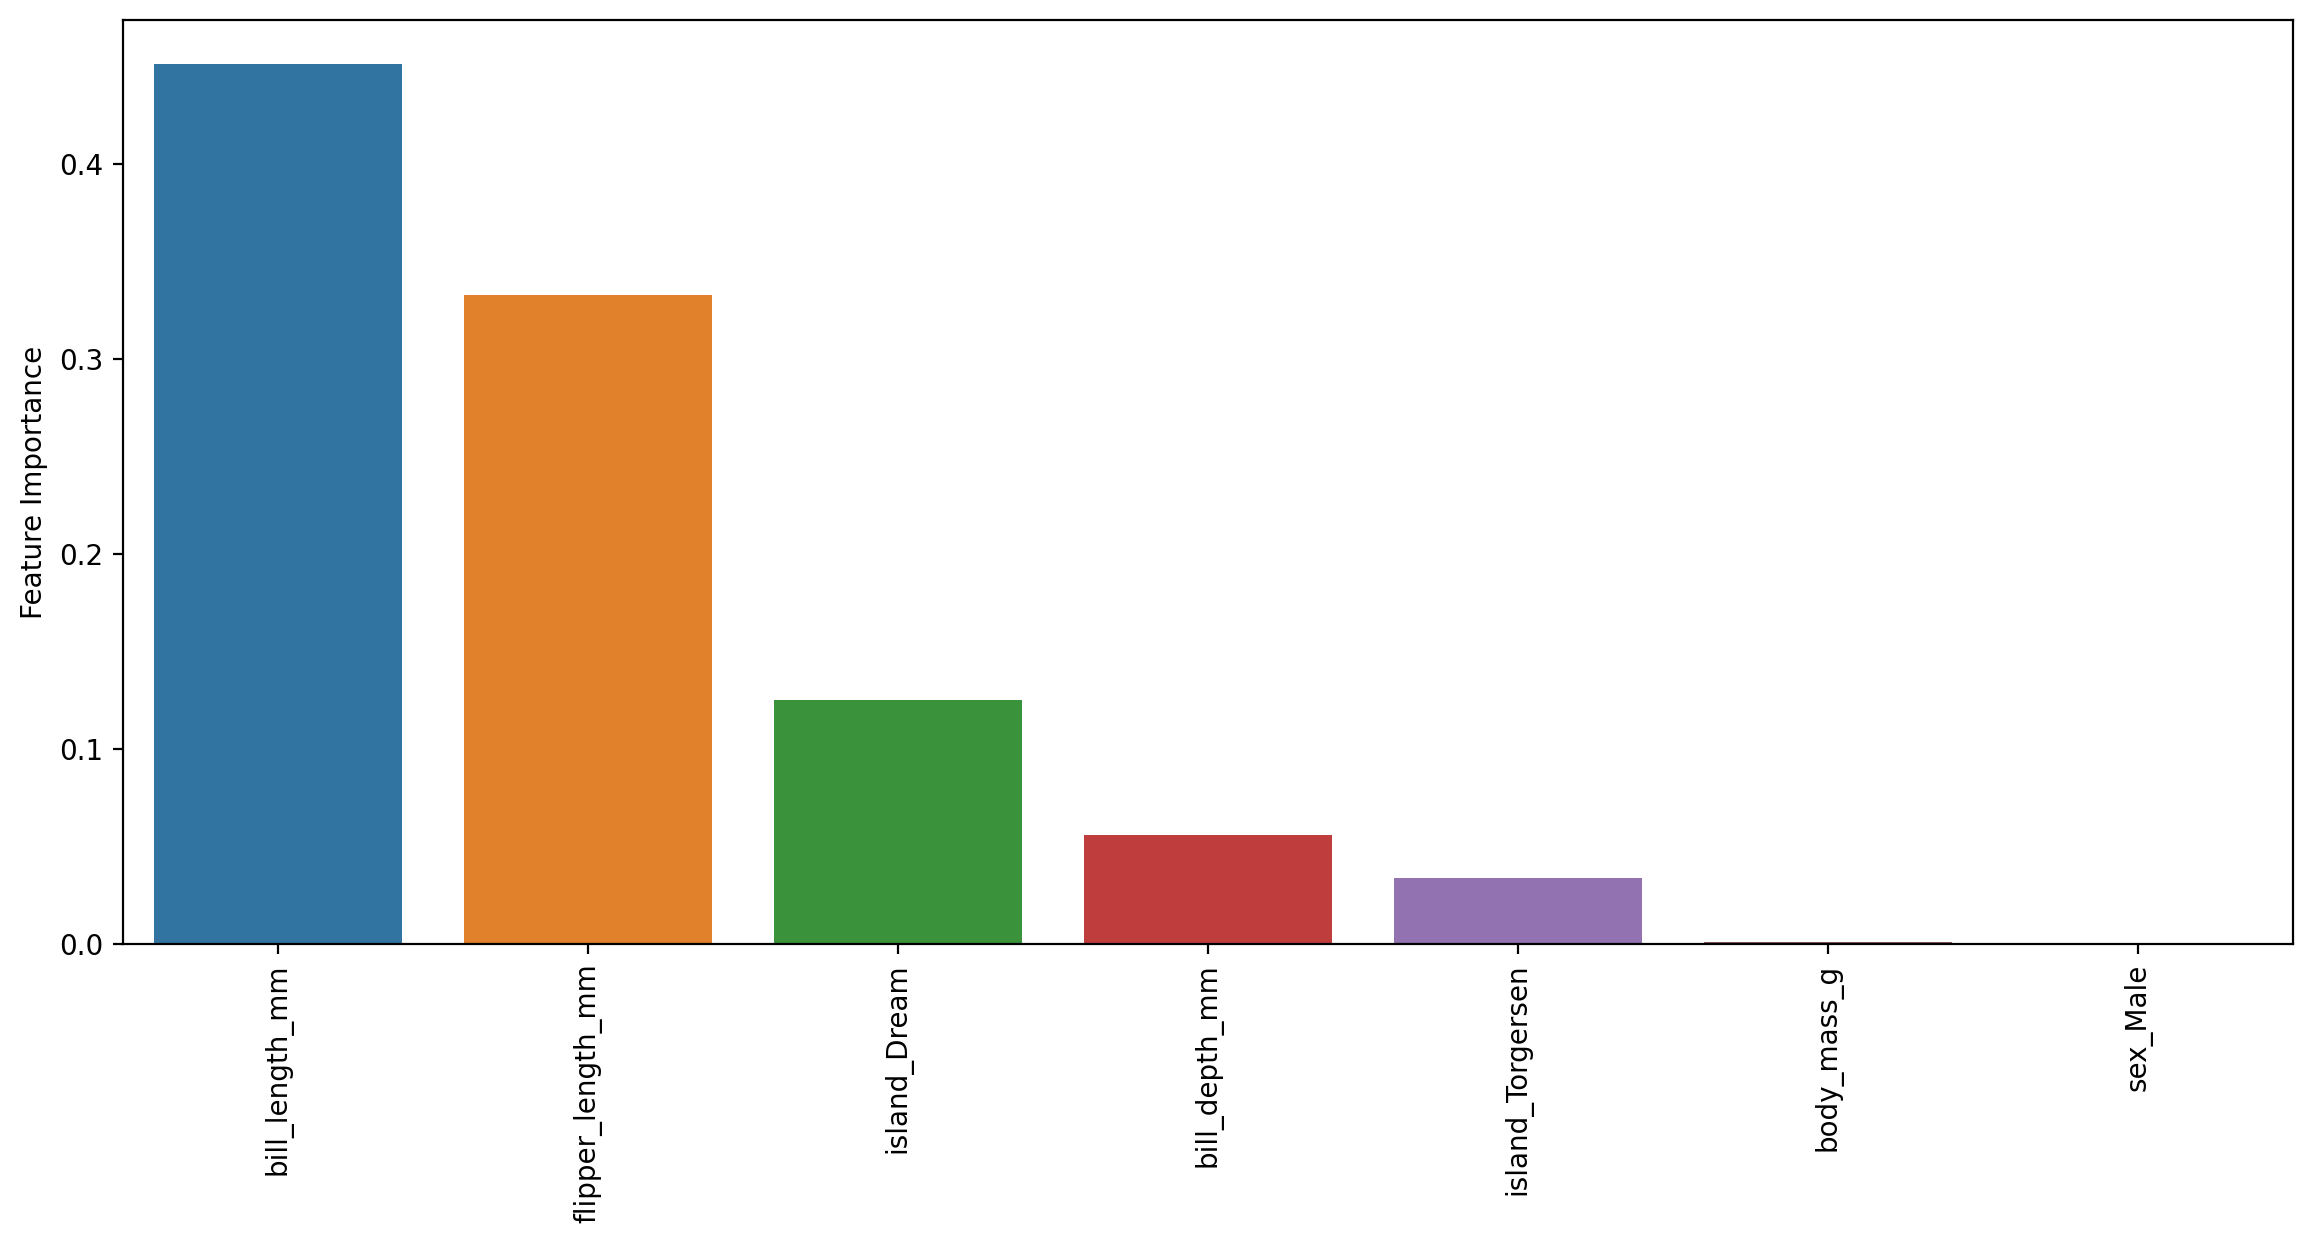

In [36]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = df_feature_importance,x=df_feature_importance.index,y='Feature Importance')

plt.xticks(rotation=90);

## Elbow

In [37]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = GradientBoostingClassifier( n_estimators=n)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - metrics.accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

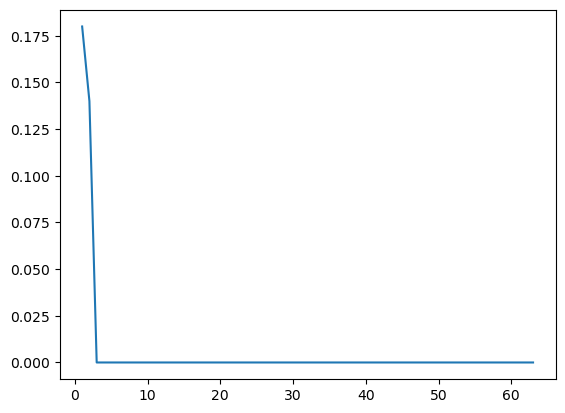

In [38]:
plt.plot(range(1,64),errors)

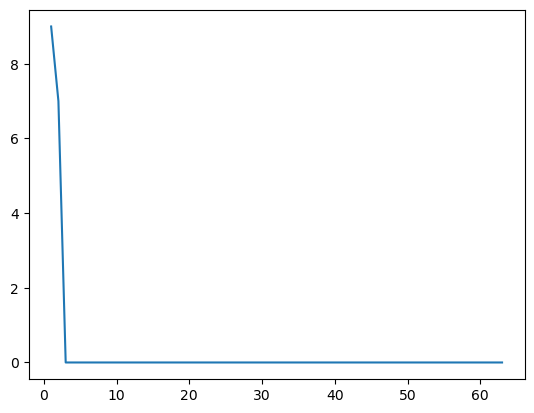

In [39]:
plt.plot(range(1,64),misclassifications)